## CS 5963 Project Milestone

# New York City Schools Survey

## **Group Members**  

Kara Johnson (u0409733) - E-mail: kjohnson@sci.utah.edu   
Sara Johnson (u0884127) - E-mail: sara.l.johnson@utah.edu

### Background and Motivation

Education is an important pillar in our society today. Many parents in America feel dissatisfied with the public school system. The goal of this project is to identify some factors which may contribute parent perceptions of their child's school. We will be using New York City as a model, as it has over 400 high schools and has made data from their annual school survey available for analysis. This survey collects responses to a number of questions pertaining to many aspects of education, but we are focusing on trust & family ties, safety, and personal attention & support as indicators of overall parent perception. We will investigate if parent perception of these aspects differ as a function of the school's location or educational opportunities such as AP courses or Career Training courses. By generating this predictive model, we can determine how to improve parent perceptions of schools in the future.

### Project Objectives

**Objective 1.** We will be looking at the positive response rates that pertain to three "Educational Elements": Parent trust in the school, parent involvement, and parent response rate
    - How do these elements relate to each other?
    - How do these elements relate to the opportunities available at these schools (extracurriculars, AP classes, CTE)? 
    - How do these elements differ between boroughs and/or districts?   
**Objective 2.** We are interested in looking at student perception of school safety a possible confounder in parent perceptions.

**Objective 3.** Finally, we will determine which factors could potentially improve parent perceptions of our education system 
    - These factors include AP and Career training availability, attendance rate, graduation rate, and percentage of positive student answers 


### Data

We collected and combined two datasets: the 2016 New York City School Survey, which collects student and parent responses to surveys about their school, and the High Schools At A Glance, which includes information about high school programs, Advanced Placement (AP) courses, and career training programs. These datasets are available online in Excel spreadsheet format.

2016 New York City School Survey: http://schools.nyc.gov/Accountability/tools/survey/default.htm   
High Schools At a Glance: http://schools.nyc.gov/ChoicesEnrollment/High/Resources/default.htm

### Data Processing

For the survey dataset, we selected a number of variables that we were interested in. These include:
- Parent response rate
- % Satisfaction with 'Collaborative Teachers'
- % Satisfaction with 'School Leadership'
- % Satisfaction with 'Rigorous Instruction'
- % Satisfaction with 'Family-Community Ties'
- % Satisfaction with 'Supportive Environment'
- % Satisfaction with 'Trust'
- % Overall Parent Satisfaction
- % Overall Student Satisfaction

We also removed all schools that do not correlate with the "High School At a Glance" dataset. This was performed by matching the school's unique DBN number provided in both datasets.   

We also extracted other variables from the "High School At a Glance" dataset that we will use for performing our analysis. These include:
- Borough
- Number of Programs
- Neighborhood
- Graduation Rate 
- Attendance Rate
- % Students who feel safe
- AP Courses 
- CTE Programs

AP Courses and CTE Programs categories were converted into a binary value: 1 for offered, 0 for not offered. 

In [1]:
import pandas as pd

#NYC School Survery Import (HSS): 
RespRate = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 0)

#High Schools At a Glance Import (HSAAG): 
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

 
# HSAAG - Keep columns of interest
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# HSAAG - Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals

schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# HSAAG - Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')

# HSS - Keep columns of interest
RespRate.columns = ['DBN','School Name', 'Parent RR','Teacher RR','Student RR','Collab. Teachers','School Leadership',
                   'Rig. Instruction','Fam-Community Ties', 'Supportive Envment.','Trust','Parent PS',
                   'Student PS', 'Teacher PS']
RespRate_cols = ['DBN','Parent RR','Collab. Teachers','School Leadership','Rig. Instruction','Fam-Community Ties', 
                 'Supportive Envment.','Trust','Parent PS','Student PS']
schools2 = RespRate[RespRate_cols]

# Combine HSAAG and HSS by joining with School DBN as index 
schoolsN = schoolsDF.join(schools2.set_index('DBN'),how = 'inner')

# Convert all non-strings to floats for easier processing 
schoolsN = schoolsN.apply(lambda x: pd.to_numeric(x,errors='ignore'))


C:\Users\Sara\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sara\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sara\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

### Exploratory Data Analysis

First, using our combined dataframe, we generated a correlation matrix and scatter matrix to identify any promising correlations. We also calculated descriptive statistics of the variables to (1) make sure that the values are reasonable and (2) identify any interesting attributes. We also generated some preliminary cluster plots and heat maps to look at interesting relationships of variables with borough and/or neighborhood.

#### 1. Correlation Matrix of Dataframe Columns

                          Number of Programs  Graduation Rate  \
Number of Programs                  1.000000         0.104687   
Graduation Rate                     0.104687         1.000000   
Attendance Rate                     0.018476         0.388747   
% students who feel safe           -0.158478         0.163138   
Parent RR                          -0.167997         0.054890   
Fam-Community Ties                 -0.210615        -0.024965   
Trust                              -0.146249         0.024204   
Student PS                         -0.179234         0.147536   

                          Attendance Rate  % students who feel safe  \
Number of Programs               0.018476                 -0.158478   
Graduation Rate                  0.388747                  0.163138   
Attendance Rate                  1.000000                  0.287862   
% students who feel safe         0.287862                  1.000000   
Parent RR                        0.200776                  

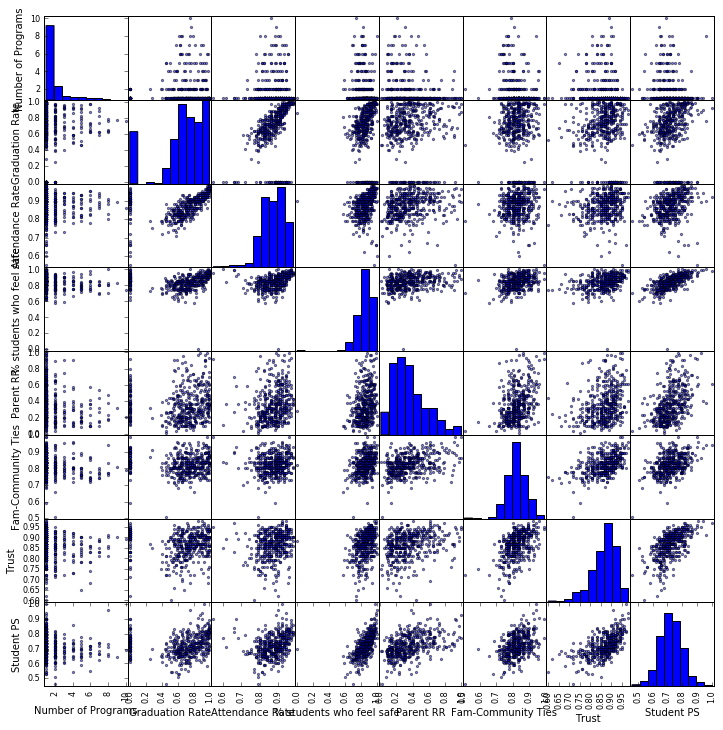

In [3]:
#cols2 = ['Number of Programs','Graduation Rate','Attendance Rate','% students who feel safe','Parent RR', 'Fam-Community Ties','Trust','Student PS']
cols3 = [0,1,3,4,5,8,12,14,16]
print(schoolsN[cols3].corr())
pd.scatter_matrix(schoolsN[cols3],figsize=(12, 12), diagonal='hist');

From the correlation and scatter matrices above, here are the most highly correlated variables (>0.30):

1. Percent Satisfaction: Student and % Students Who Feel Safe (0.625)
2. Percent Satisfaction: Trust and Percent Satisfaction: Student (0.605)
3. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Trust (0.497)
4. Percent Satisfaction: Student and Total Parent Response Rate (0.468)
5. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Student (0.438)
6. Graduation Rate and Attendance Rate (0.389)
7. Percent Satisfaction: Strong Family-Community Ties and Total Parent Response Rate (0.380)
8. Percent Satisfaction: Trust and % Students Who Feel Safe (0.348)
9. Percent Satisfaction: Strong Family-Community Ties and % Students Who Feel Safe (0.313)



#### 2. Descriptive Statistics

In [10]:
schoolsN.describe()

C:\Users\Sara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Number of Programs,Graduation Rate,Attendance Rate,% students who feel safe,AP Courses y/n,CTE y/n,Parent RR,Collab. Teachers,School Leadership,Rig. Instruction,Fam-Community Ties,Supportive Envment.,Trust,Parent PS,Student PS
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,436.000000,438.000000
mean,1.762557,0.656895,0.870822,0.842991,0.726027,0.289954,0.359338,0.795479,0.836187,0.807968,0.823196,0.701689,0.863744,0.895642,0.720457
std,1.596124,0.291114,0.063280,0.090275,0.446505,0.454260,0.207963,0.102055,0.107441,0.082881,0.059273,0.082686,0.062255,0.046538,0.075210
min,1.000000,0.000000,0.550000,0.000000,0.000000,0.000000,0.010000,0.430000,0.420000,0.510000,0.510000,0.390000,0.600000,0.670000,0.460000
25%,1.000000,0.580000,0.830000,0.790000,0.000000,0.000000,0.200000,0.740000,0.780000,0.760000,0.780000,0.650000,0.830000,NaN,0.670000
50%,1.000000,0.720000,0.880000,0.850000,1.000000,0.000000,0.310000,0.810000,0.860000,0.820000,0.820000,0.700000,0.870000,NaN,0.720000
75%,2.000000,0.870000,0.920000,0.910000,1.000000,1.000000,0.470000,0.877500,0.920000,0.870000,0.860000,0.750000,0.910000,NaN,0.770000
max,10.000000,1.000000,0.980000,1.000000,1.000000,1.000000,0.990000,0.980000,0.990000,0.970000,0.990000,0.980000,0.980000,1.000000,1.000000


The descriptive statistics above show that some of the variables have high standard deviations, such as Number of Programs, Graduation Rate, and Total Parent Response Rate. Additionally, the mean Percent Satisfaction for the three educational elements we're interested in range from 72.0-82.3% with relatively low standard deviations (0.059-0.075). However, the ranges of these percentages are fairly high (with both low minimums and high maximums) and show some promise for analysis of why some schools yielded such low percentages.


#### 3. Relationship of variables to borough/neighborhood

To determine if trends vary across neighborhoods (neighborhoods with less than three schools are excluded from the analysis) and/or boroughs, the data is grouped by 'Neighborhood' and 'Borough.' The average Percent satisfaction for all six survery categories is plotted in a stacked bar graph to look for variability among neighborhoods and boroughs. 



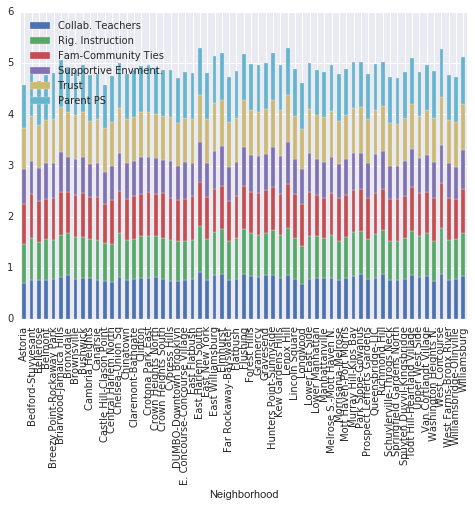

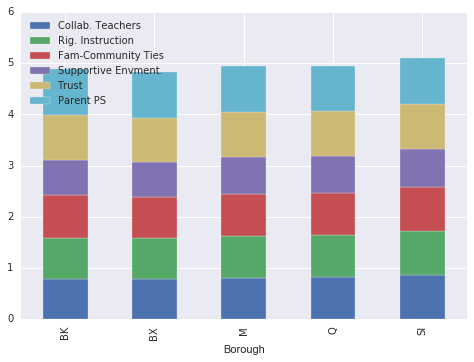

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set()

#Groupby Neighborhood in order to filter out groups smaller than 3
schoolsHood = schoolsN.groupby(['Neighborhood']).filter(lambda g: len(g) >= 3)

#Make df grouped by Neighboorhood (only Neighbors w/ >= 3 schools)
schools_ByHood = schoolsHood.groupby(['Neighborhood']).mean()

#Make stacked bar-graph using the GroupBy object 
dfplt = schools_ByHood[[7,9,10,11,12,13]]
dfplt.plot.bar(stacked=True)
#Make scatter plot matrix with cmap = Neighborhood
#dfplt = schoolsHood[[2,8,9,10,11,12,13,14]]
#pal = sns.palplot(sns.color_palette("husl", len(schools_ByHood)))
#sns.pairplot(dfplt,kind="scatter",hue = 'Neighborhood',palette =pal)

# Make df grouped by Borough
schools_ByBorough = schoolsHood.groupby(['Borough']).mean()

#Make stacked bar-graph using the GroupBy object 
dfplt = schools_ByBorough[[7,9,10,11,12,13]]
dfplt.plot.bar(stacked=True)
#Make scatter plot matrix with cmap = Neighborhood
#dfplt = schoolsN[[0,8,9,10,11,12,13,14]]
#pal = sns.palplot(sns.color_palette("husl", len(schools_ByBorough)))
#sns.pairplot(dfplt,kind="scatter",hue = 'Borough',palette =pal)

Neighborhoods, which make up the 6 different Boroughs, appear to be more variable in their percent satisfaction than the Boroughs. And all neighborhoods and boroughs appear to have the lowest satisfaction in Supportive Environment category. However, this exploratory analysis is limited by the small range of average percentage satifaction rates. 

Therefore, data columns were normalized to highlight cells which are above and below the average percent satisfaction rates. First, the variables are split between School Statistics (ie: graduation rate, attendance rate, etc), and Survey Results (ie: Percent Satisfaction: Rigorous Instruction). Pivot tables of the dataframe grouped by Neighborhood or Borough were created to allow heatmaps to be easily created in seaborn. The heatmaps show the data which was normalized column-wise and sorted by Parent Response Rate (Parent RR). 

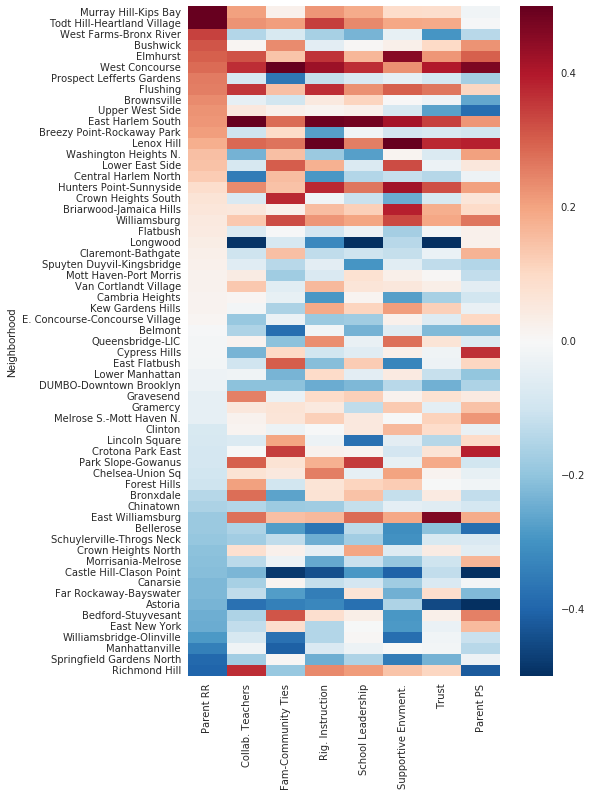

In [6]:
import numpy as np
dfplt = schoolsHood[[2,8,9,10,11,12,13,14,15]]
dfplt2 = pd.pivot_table(dfplt,index = ['Neighborhood'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = ['Parent RR','Collab. Teachers','Fam-Community Ties','Rig. Instruction',
                                    'School Leadership','Supportive Envment.','Trust','Parent PS']
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [7,12]
plt.figure(1)
sns.set_context('notebook',font_scale=1)
sns.heatmap(dfplt3,vmin=-.5,vmax=.5)


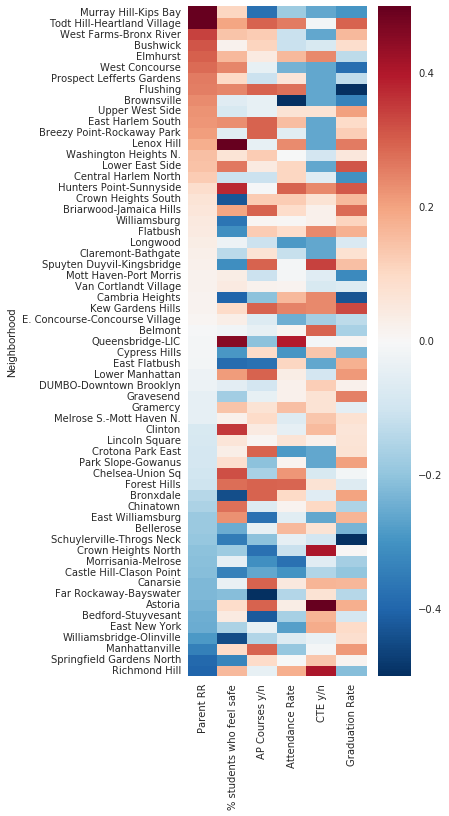

In [7]:
dfplt = schoolsHood[[2,3,4,5,6,7,8]]
dfplt2 = pd.pivot_table(dfplt,index = ['Neighborhood'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = cols[-1:]+cols[:-1]
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [4,12]
plt.figure(1)
sns.set_context('notebook',font_scale=1)
sns.heatmap(dfplt3,vmin=-.5,vmax=.5)


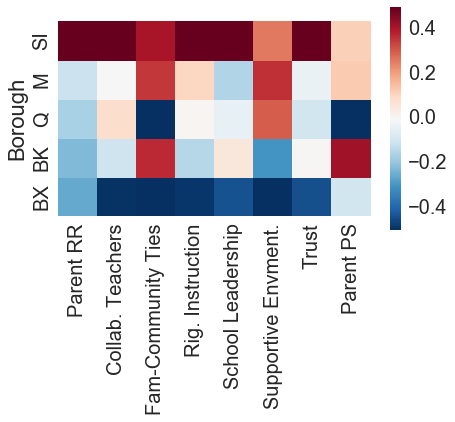

In [8]:
dfplt = schoolsN[[0,8,9,10,11,12,13,14,15]]
dfplt2 = pd.pivot_table(dfplt,index = ['Borough'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = ['Parent RR','Collab. Teachers','Fam-Community Ties','Rig. Instruction',
                                    'School Leadership','Supportive Envment.','Trust','Parent PS']
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [7,4]
plt.figure(1)
sns.set_context('notebook',font_scale=2)
sns.heatmap(dfplt3,square=True,vmin=-.5,vmax=.5)


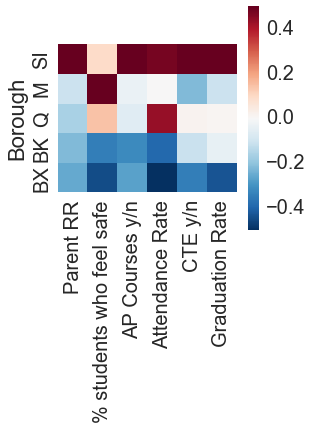

In [9]:
dfplt = schoolsN[[0,3,4,5,6,7,8]]
dfplt2 = pd.pivot_table(dfplt,index = ['Borough'])
dfplt2 = dfplt2.sort_values(['Parent RR'],ascending=False)
dfplt2 = dfplt2.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cols = dfplt2.columns.tolist()
colsN = cols[-1:]+cols[:-1]
dfplt3 = dfplt2[colsN]

plt.rcParams['figure.figsize'] = [4,4]
plt.figure(1)
sns.set_context('notebook',font_scale=2)
sns.heatmap(dfplt3,square=True,vmin=-.5,vmax=.5)

Visually, it appears that neighboorhoods and boroughs with a lower Parent Response Rate (RR) also score lower in percent satisfaction of many categories, especially "Supportive Environment." For individual neighborhoods, "Trust" and "Collaborative Teachers" appears to be less correlated to Parent RR. The Percent of Students Who Feel Safe seems to be more correlated to Parent RR than Graduation Rate or Attendance Rate. Also, interestingly, whether CTE programs are offered seems to be inversely related to Parent RR when grouped by Neighborhoods. Looking only at boroughs, Statten Island (SI) stands out more from the other buroughs with much greater than average scores in all categories. Overall, this data suggests that parents are more concerned with more nuanced measures of school environment rather than the liklihood of their student to graduate or attend class, or the types of programs offered at the school. 

#### 4. Histograms 

['Borough', 'Number of Programs', 'Neighborhood', 'Graduation Rate', 'Attendance Rate', '% students who feel safe', 'AP Courses y/n', 'CTE y/n', 'Parent RR', 'Collab. Teachers', 'School Leadership', 'Rig. Instruction', 'Fam-Community Ties', 'Supportive Envment.', 'Trust', 'Parent PS', 'Student PS']


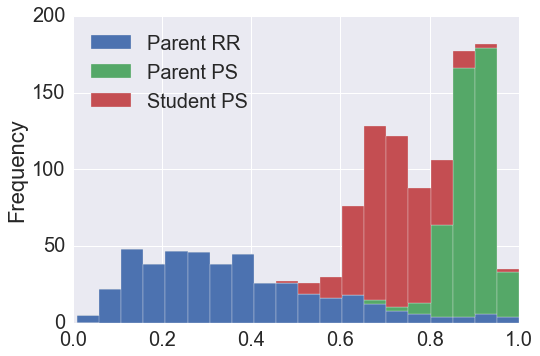

In [15]:
print(schoolsN.columns.tolist())

dfplt = schoolsN[['Parent RR','Parent PS','Student PS']]

plt.figure();

dfplt.plot.hist(stacked=True, bins=20)

While overall parent percent satisfaction (Parent PS) as measured by the High School Survey is quite high (>80%) for most schools, less than half of parents are responding (Parent RR) to the school surveys in most schools. Therefore, the outcomes of the High School Surverys could be biased towards the attitudes of the most engaged parents. The fact that student satisfaction (Student PS) is more widely varied also indicates that this could be true. By determining factors in schools which lead to a higher parent response rate, we may be able to determine school characteristics which lead to greater parent interest and connectivity with their children's schools. Additionally, we have identified that there may be a sampling bias in the NYC School Survery, and our analysis may help to prove that positive survery results could be overstated. 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Scale the dataset, find PCA and transform coordinates
schoolsScaled = scale(schoolsN[cols3])

PCAmodel = PCA()
schoolsPCA = PCAmodel.fit_transform(schoolsScaled)

# create a new pandas dataframe 

PCAdf = pd.DataFrame(schoolsPCA, index=schoolsN.index,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
PCAcols = ['PC1','PC2','PC3','PC4']
score = []
k = []

# clustering for k = 1 to k = 15
#for i in range(1,15):
 #   model = KMeans(n_clusters=i)
#  model.fit_predict(PCAdf[PCAcols])
 #   score.append(model.score(PCAdf[PCAcols]))
#  k.append(i)

plt.plot(k, score)
plt.ylabel('Inertia')
plt.xlabel('k')
plt.show()

# k = 6
km_model = KMeans(n_clusters=6)
km_fit = km_model.fit_predict(PCAdf[PCAcols])

plt.scatter(PCAdf['PC1'],PCAdf['PC2'],c=km_fit,cmap='gist_ncar',s=200)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Analysis Methodology

Next, using our findings from our exploratory data analysis, we will move into the data analysis phase of our project. This phase includes the following objectives:

For Objective 1:
We will use multilinear regression to determine if there is any significant relationship between the NYC survery elements, i.e. if the answers to the questions pertaining to each element are correlated to one another. We will also use multilinear regression to determine if there is any significant relationship between the parents' satisfaction in each of these areas and the opportunities available at the schools, such as AP classes and career training programs. Finally, we will use linear regression to determine whether parent response rate is strongly correlated to parent satisfaction, and identify confounders. 

For Objective 2:
Using the multilinear regression models from Objective 1, we might be able to determine if safety perception is a confounder for parent trust in the school, involvement, and response rate.     

For Objective 3: 
After performing multilinear regression, we will take the most significant variables and use the to build a model using a decision tree to predict if parent response rates were > 50%. To determine if there is a dependence of parent response on school location, we will add school boroughs and districts to determine which, if either, improves the predictive model.